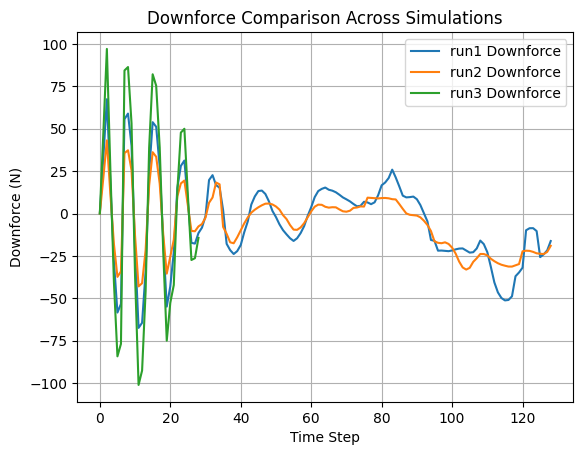

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load clean data
df = pd.read_csv("drag_lift.csv", header=None, names=["run", "time", "z_unused", "downforce"])
df.drop(columns="z_unused", inplace=True)

# Plot
for run_id in df["run"].unique():
    subset = df[df["run"] == run_id]
    plt.plot(subset["time"], subset["downforce"], label=f"{run_id} Downforce")

plt.xlabel("Time Step")
plt.ylabel("Downforce (N)")
plt.title("Downforce Comparison Across Simulations")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Load and clean data
df = pd.read_csv("drag_lift.csv", header=None, names=["run", "time", "z_unused", "downforce"])
df.drop(columns="z_unused", inplace=True)

# Group by run and compute mean downforce
agg = df.groupby("run")["downforce"].agg(["mean", "std", "min", "max"]).reset_index()
agg.rename(columns={"mean": "avg_downforce"}, inplace=True)

print(agg)

    run  avg_downforce        std       min      max
0  run1      -4.912286  25.347967  -67.4481  67.3880
1  run2      -6.117692  17.704811  -42.9783  43.1250
2  run3       0.427112  59.585438 -101.0720  97.0437


In [12]:
agg["velocity"] = [50, 40, 30]
agg["angle_of_attack"] = [0, 5, 10]
agg["variant"] = ["baseline", "wing_lifted", "wing_flat"]


In [16]:
model = RandomForestRegressor()
model.fit(X, y)

# Predict on the same data (not ideal for generalization, but okay to test)
y_pred= model.predict(X)
for actual, predicted in zip(y, preds):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")



Actual: -4.91, Predicted: -4.58
Actual: -6.12, Predicted: -4.93
Actual: 0.43, Predicted: -1.42


In [17]:
mae = mean_absolute_error(y, preds)
mse = mean_squared_error(y, preds)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}")

MAE: 1.12, MSE: 1.65


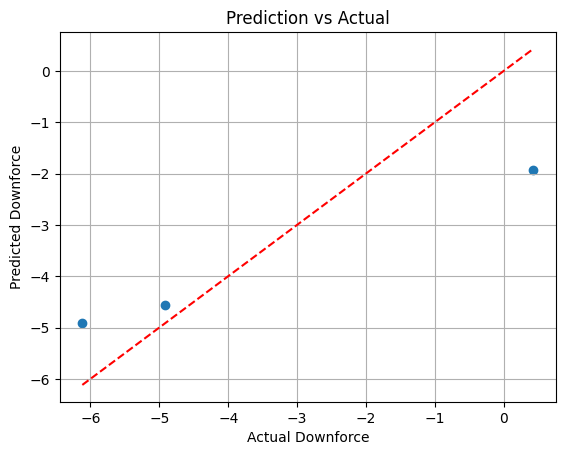

In [19]:
import matplotlib.pyplot as plt

# Plot predicted vs actual
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel("Actual Downforce")
plt.ylabel("Predicted Downforce")
plt.title("Prediction vs Actual")
plt.grid(True)
plt.show()

